# tvAR2
# Gaussian Kernel
# Increasing T
# Fixed t=50

In [7]:
import sys
import os

sys.path.append(os.path.abspath('D:/ExperimentsPhD/wasslsp/Jan_Experiments'))

In [8]:
import numpy as np
import scipy as scp

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#from src.utils import *
from src.kernels import Kernel

import warnings
warnings.filterwarnings('ignore')

# T=100

In [49]:
T = 100
n_replications = 200
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

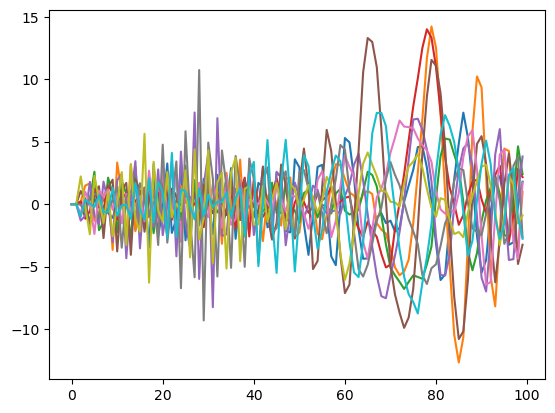

In [50]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [51]:
X_dict.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [52]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

In [53]:
X_tvar_2_replications.shape

(200, 100)

In [54]:
X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

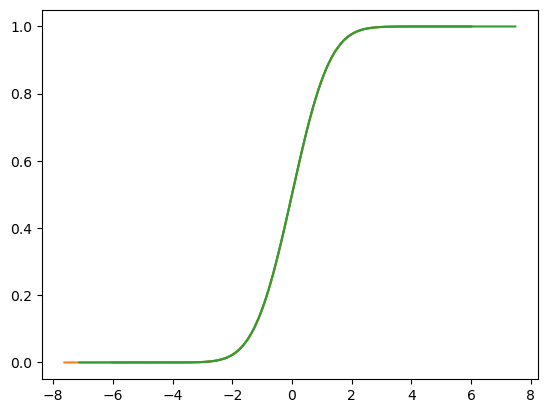

In [55]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [56]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)],t)
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)

In [57]:
#weights_10 = {}
#weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    #weights_10[str(replication)] = gaussian_weights[str(replication)] 
    #weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


In [58]:
weights_50['0'].shape

(100,)

In [37]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

,0
0,6.119952e-04
1,6.176187e-04
2,6.231787e-04
3,9.707015e-03
4,4.326453e-10
5,8.264226e-02
6,1.663729e-04
7,1.228214e-08
8,3.831207e-02
9,2.446301e-03


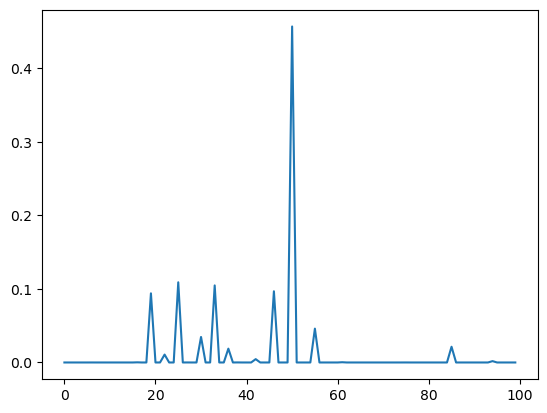

In [59]:
plt.plot(weights_50['0'])

In [60]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

In [61]:
weights_50['0'].shape

(100,)

In [62]:
replicated_NW_cdfs_50['0'].shape

(100,)

<Axes: >

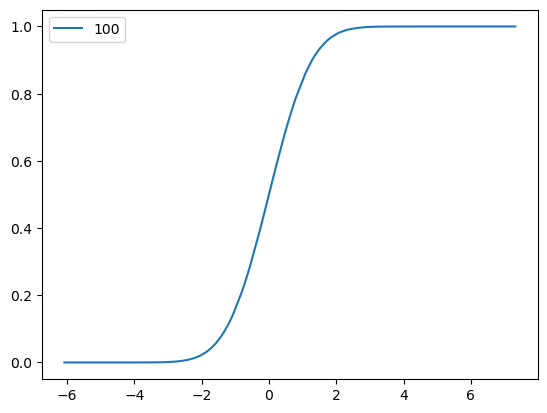

In [63]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

In [64]:
def eval_univariate(x, weights):
        """Inner function for ECDF of one variable."""
        sorter = x.argsort()
        x = x[sorter]
        weights = weights[sorter]
        y = weights.cumsum()

        # if self.stat in ["percent", "proportion"]:
        y = y / y.max()
        # if self.stat == "percent":
            # y = y * 100

        # x = np.r_[-np.inf, x]
        # y = np.r_[0, y]
        x = np.r_[x]
        y = np.r_[y]

        # if self.complementary:
            # y = y.max() - y

        return y, x

(200, 100) (200, 100)


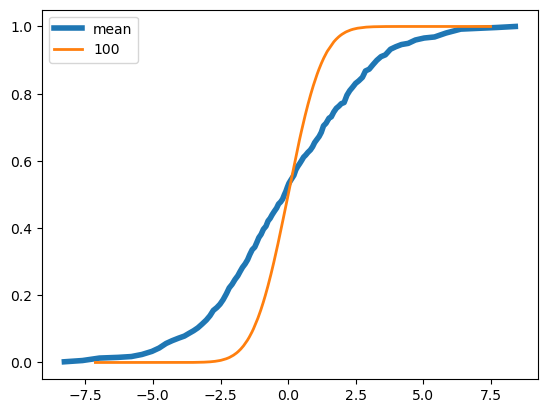

Wasserstein distance for each replication:  [0.22667090781865024, 0.12141443527403653, 0.0769912783802461, 0.1419958815420524, 0.053055920962352565, 0.13918634375498043, 0.08739108121436137, 0.12104360453816311, 0.10560781094294404, 0.11990500591712487, 0.23527407119643323, 0.13554414340236823, 0.15111309814521828, 0.07754637663686781, 0.22367797027114897, 0.2552191451618385, 0.12328613707853996, 0.06550321067483647, 0.2645203010422617, 0.13086611815396815, 0.14141623645407073, 0.38500661615443377, 0.25456662435114796, 0.1493383151704964, 0.09601997668113343, 0.24188710579979278, 0.047467172935160375, 0.16904823107837086, 0.3301245731334877, 0.2558986981057024, 0.09027166051660865, 0.11660382229645415, 0.19938828466732667, 0.41214326641075893, 0.23738735032635555, 0.13463216887813645, 0.2126924770109218, 0.12163219174927939, 0.20815038391631674, 0.04678047285481985, 0.26219818212265705, 0.42815118212570313, 0.14799394019142245, 0.17562126530138034, 0.07652774386080205, 0.09993586119007

In [65]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [66]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

In [67]:
from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.1097015595272238

In [68]:
1 / (T**.5 *bandwith**(d+1))  + bandwith

0.9868308976105993

# T=500

In [185]:
T = 500
n_replications = 20
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

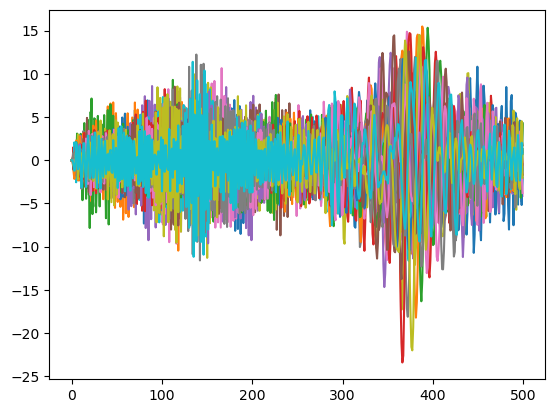

In [186]:
for replication in range(n_replications):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [187]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

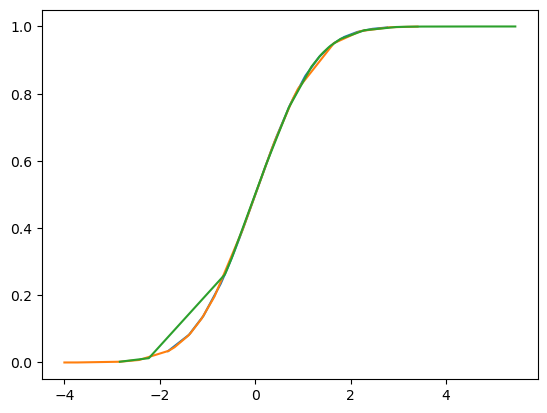

In [188]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [189]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)])
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


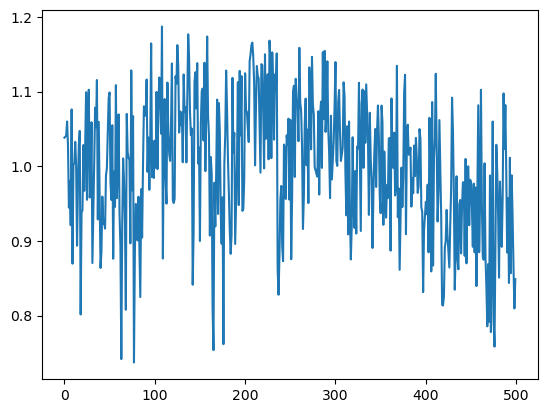

In [190]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(gaussian_weights_['0'])

In [191]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

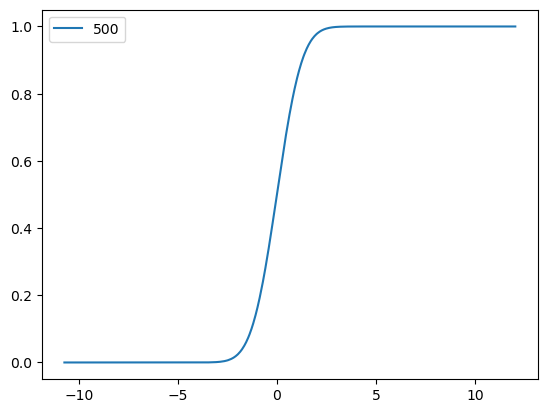

In [192]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(20, 500) (20, 500)


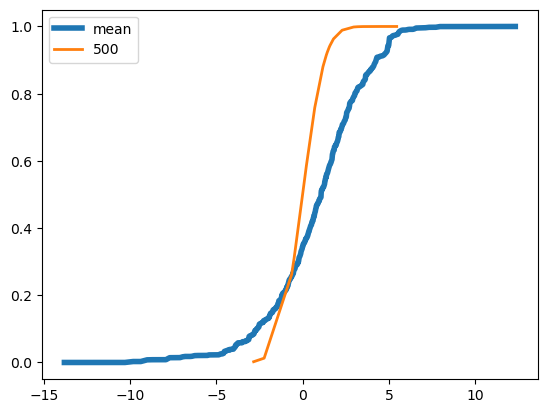

Wasserstein distance for each replication:  [0.42007156053162825, 0.22155837952543284, 0.31607705820858945, 0.3978829353212767, 0.21355065365678294, 0.2507942175274345, 0.45044913416886456, 0.5590680567448723, 0.26795193588876487, 0.22752598156834836, 0.3756611661598571, 0.31590255275350076, 0.3098413923729615, 0.31828526427162124, 0.46222292721073294, 0.2892529428818237, 0.03884668759163705, 0.46566907630292886, 0.6168016639544208, 0.2924457741929586]


In [193]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)][49])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [194]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.3362355325554607

# T=1000

In [92]:
T = 1000
n_replications = 20
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

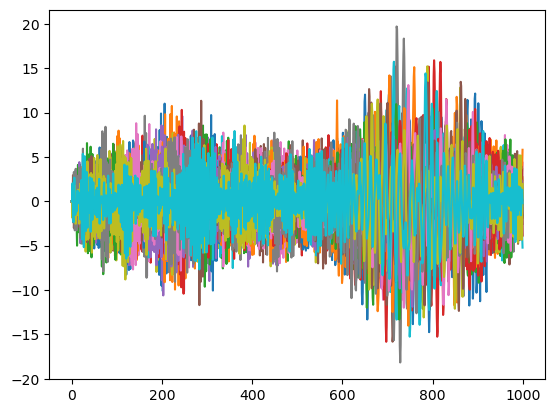

In [93]:
for replication in range(n_replications):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [95]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

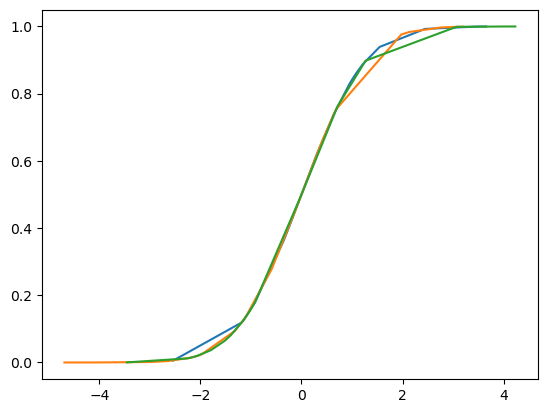

In [97]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [98]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)])
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


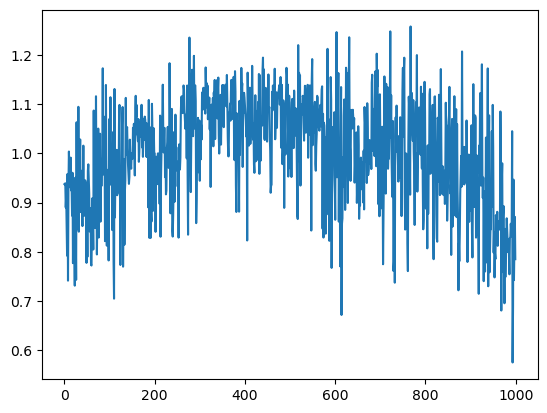

In [99]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(gaussian_weights_['0'])

In [100]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

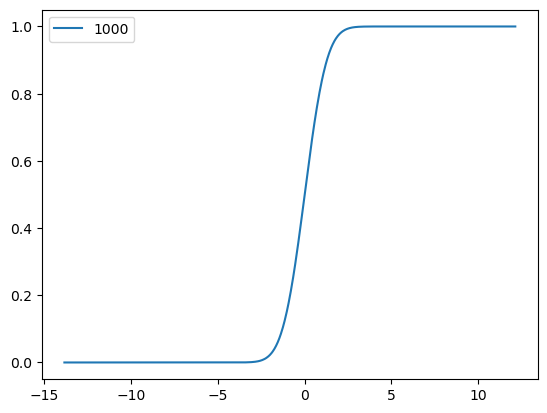

In [101]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(20, 1000) (20, 1000)


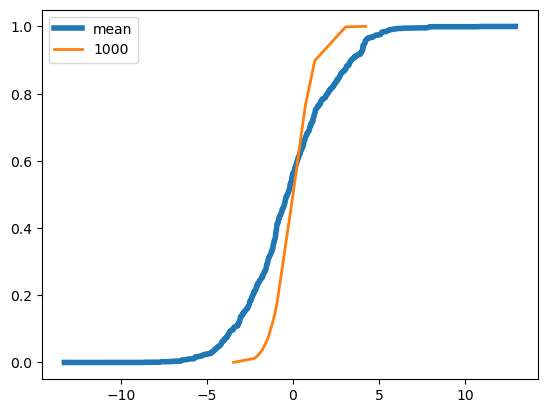

Wasserstein distance for each replication:  [0.20145167255307425, 0.25509544645179966, 0.32397005548366237, 0.18091077116406096, 0.09813021717328353, 0.35227936738088234, 0.20150858331948623, 0.10986955948370458, 0.09468936150340676, 0.140647225598618, 0.16834092962726868, 0.20378568134803546, 0.3222155473873751, 0.1707510453685956, 0.11385890603100507, 0.25209477256579355, 0.17598193883649926, 0.2655131743403961, 0.15982894385328653, 0.19874448741097747]


In [102]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)][49])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [103]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.183716303189013

# T=1500

In [111]:
T = 1500
n_replications = 20
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

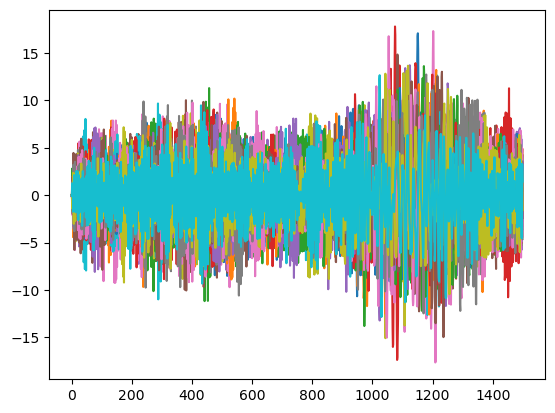

In [112]:
for replication in range(n_replications):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [113]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

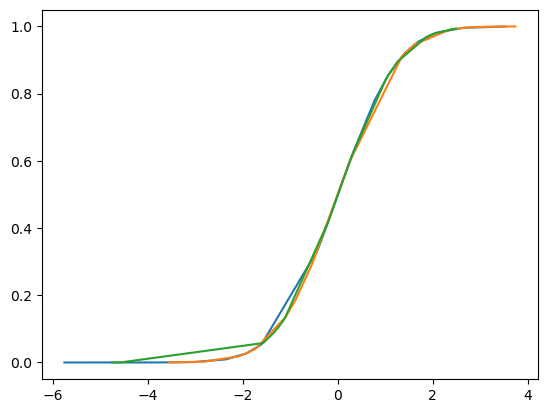

In [115]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [116]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)])
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


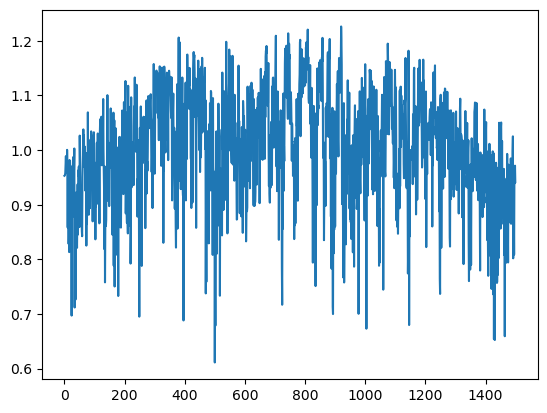

In [117]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(gaussian_weights_['0'])

In [118]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

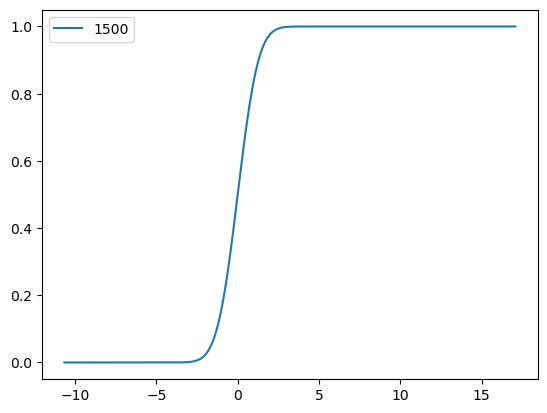

In [119]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(20, 1500) (20, 1500)


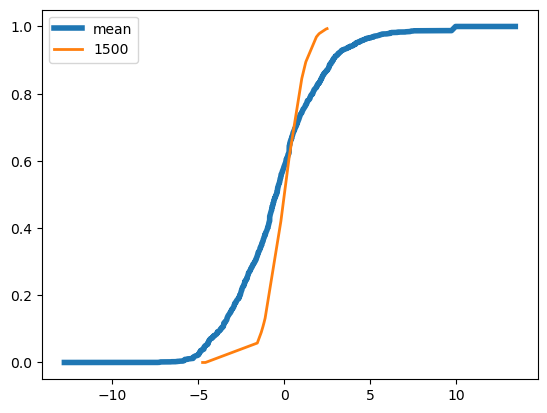

Wasserstein distance for each replication:  [0.057879765836820654, 0.1570661977116257, 0.19870688793262584, 0.11835668635082723, 0.1813107894748392, 0.0753926376341138, 0.0586310730064889, 0.1018902561186564, 0.13267835527054625, 0.13736340075411999, 0.12828234888654425, 0.0408029320816582, 0.0370414538527417, 0.3131806748215818, 0.12965811708192349, 0.11738124783772369, 0.139430591667008, 0.13336422454300415, 0.042747098076115625, 0.16876464354343249]


In [120]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)][49])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [121]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.09106253956161565

# T=2000

In [122]:
T = 2000
n_replications = 20
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

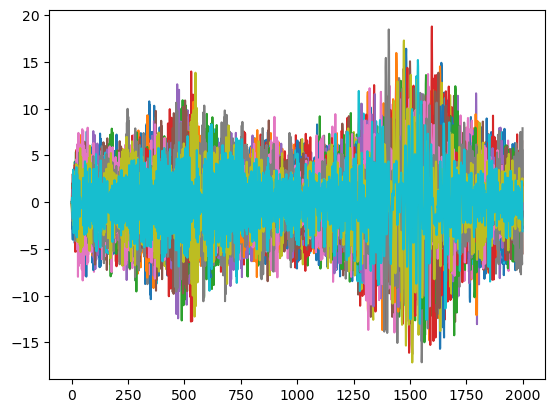

In [123]:
for replication in range(n_replications):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [124]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

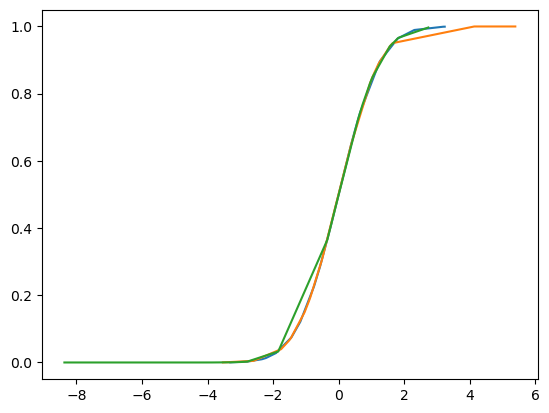

In [125]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [126]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)])
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


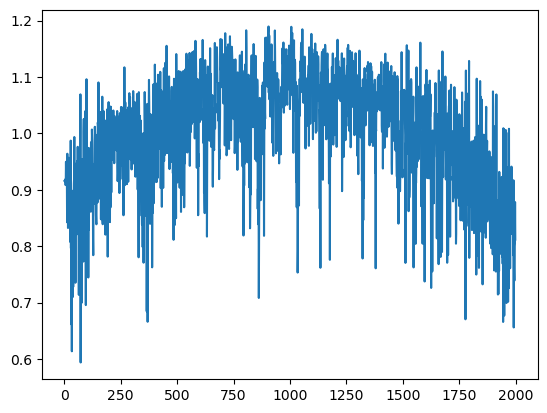

In [127]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(gaussian_weights_['0'])

In [128]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

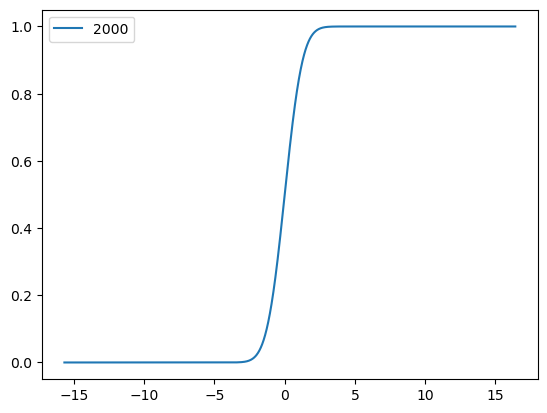

In [129]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(20, 2000) (20, 2000)


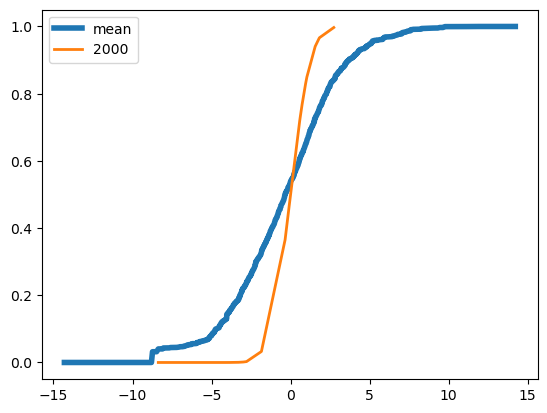

Wasserstein distance for each replication:  [0.17774249554281274, 0.2405647279296774, 0.13755385359209799, 0.10761178298499381, 0.11557078988573687, 0.19240428324180875, 0.2832271580788287, 0.17147024521109844, 0.09751972488060934, 0.22131823319286628, 0.31498982567159706, 0.08322556470669233, 0.0688975197586322, 0.41209926261870866, 0.20402996078634014, 0.26214022049325625, 0.547967493697187, 0.08801392199583816, 0.23811717110614983, 0.05658976686886523]


In [130]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)][49])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [131]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.15285609506990314

# T=10000

In [195]:
T = 10000
n_replications = 20
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

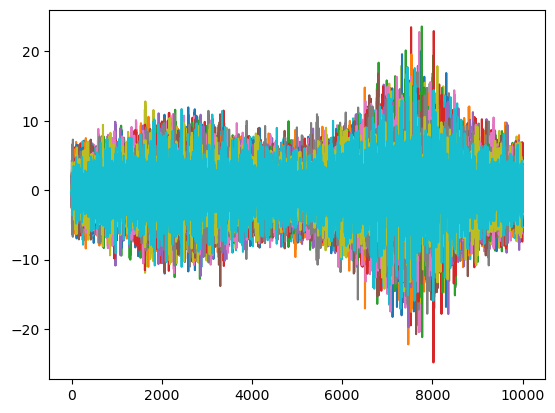

In [196]:
for replication in range(n_replications):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [197]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

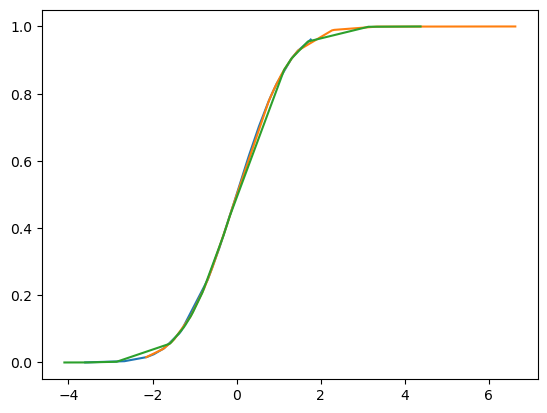

In [198]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [ ]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)])
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


In [ ]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(gaussian_weights_['0'])

In [ ]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

In [ ]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

In [ ]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)][49])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [ ]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)